<a href="https://colab.research.google.com/github/Eugeg94/ProyectoFINALWBL/blob/main/PROYECTOFINAL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###SEGUNDA PARTE PROYECTO FINAL PARTE 2

In [ ]:

import numpy as np
import pandas as pd
import scipy as sp
from prettytable import PrettyTable


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

mpl.style.use('bmh')


from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1= pd.read_excel("/content/drive/MyDrive/Datasetwl (1).xlsx")
df1.head()

,Economy,Economy Code,ISO Code,Region,Income Group,Report Year,WBL INDEX,MOBILITY,Can a woman choose where to live in the same way as a man?,Can a woman travel outside her home in the same way as a man?,...,Do men and women have equal ownership rights to immovable property?,Do sons and daughters have equal rights to inherit assets from their parents?,Do male and female surviving spouses have equal rights to inherit assets?,Does the law grant spouses equal administrative authority over assets during marriage?,Does the law provide for the valuation of nonmonetary contributions?,PENSION,Is the age at which men and women can retire with full pension benefits the same?,Is the age at which men and women can retire with partial pension benefits the same?,Is the mandatory retirement age for men and women the same?,Are periods of absence due to childcare accounted for in pension benefits?
0,Afghanistan,AFG,AFG,South Asia,Low income,1971,26.25,25,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No
1,Afghanistan,AFG,AFG,South Asia,Low income,1972,26.25,25,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No
2,Afghanistan,AFG,AFG,South Asia,Low income,1973,26.25,25,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No
3,Afghanistan,AFG,AFG,South Asia,Low income,1974,26.25,25,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No
4,Afghanistan,AFG,AFG,South Asia,Low income,1975,26.25,25,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No


In [ ]:

df1_1 = df1.copy()

df1_1 = df1_1.drop(columns=['Length of paid paternity leave', 'Days for the father' , 'Is paid leave of at least 14 weeks available to mothers?', 'Can a woman travel outside her home in the same way as a man?', 'Can a woman apply for a passport in the same way as a man?', 'Can a woman travel outside the country in the same way as a man?', 'Are there criminal penalties or civil remedies for sexual harassment in employment?', 'Can a woman work at night in the same way as a man?', 'Can a woman work in a job deemed dangerous in the same way as a man?', 'Can a woman work in an industrial job in the same way as a man?', 'Is the law free of legal provisions that require a married woman to obey her husband?', 'Can a woman be head of household in the same way as a man?', 'Does a woman have the same rights to remarry as a man?', 'Is paid leave of at least 14 weeks available to mothers?','Does the government administer 100% of maternity leave benefits?', 'Is there paid leave available to fathers?', 'Is there paid parental leave?', 'Is dismissal of pregnant workers prohibited?', 'Does the law prohibit discrimination in access to credit based on gender?', 'Can a woman sign a contract in the same way as a man?', 'Can a woman open a bank account in the same way as a man?', 'Do sons and daughters have equal rights to inherit assets from their parents?', 'Do male and female surviving spouses have equal rights to inherit assets?', 'Does the law grant spouses equal administrative authority over assets during marriage?', 'Does the law provide for the valuation of nonmonetary contributions?', 'Is the age at which men and women can retire with partial pension benefits the same?', 'Is the mandatory retirement age for men and women the same?', 'Are periods of absence due to childcare accounted for in pension benefits?', 'Economy Code', 'ISO Code', 'Region' ] )

df1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10070 entries, 0 to 10069
Data columns (total 25 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Economy                                                                            10070 non-null  object 
 1   Income Group                                                                       10070 non-null  object 
 2   Report Year                                                                        10070 non-null  int64  
 3   WBL INDEX                                                                          10070 non-null  float64
 4   MOBILITY                                                                           10070 non-null  int64  
 5   Can a woman choose where to live in the same way as a man?                         10070 non-null  obj

## Transformacion de variables

In [ ]:
le_Economy = preprocessing.LabelEncoder()
df1_1['Economy']   = le_Economy.fit_transform(df1_1['Economy'] )
le_IncomeGroup = preprocessing.LabelEncoder()
df1_1['Income Group']  = le_IncomeGroup .fit_transform(df1_1['Income Group'] )
le_Canawomanchoosewheretoliveinthesamewayasaman = preprocessing.LabelEncoder()
df1_1['Can a woman choose where to live in the same way as a man?']  = le_Canawomanchoosewheretoliveinthesamewayasaman .fit_transform(df1_1['Can a woman choose where to live in the same way as a man?'] )
le_Canawomangetajobinthesamewayasaman = preprocessing.LabelEncoder()
df1_1['Can a woman get a job in the same way as a man?']  = le_Canawomangetajobinthesamewayasaman .fit_transform(df1_1['Can a woman get a job in the same way as a man?'] )
le_Doestlawdiscriminationgender = preprocessing.LabelEncoder()
df1_1['Does the law prohibit discrimination in employment based on gender?']   = le_Doestlawdiscriminationgender.fit_transform(df1_1['Does the law prohibit discrimination in employment based on gender?'] )
le_Isexualharassmentemployment = preprocessing.LabelEncoder()
df1_1['Is there legislation on sexual harassment in employment?']   = le_Isexualharassmentemployment.fit_transform(df1_1['Is there legislation on sexual harassment in employment?'] )
le_Doesequalremuneration = preprocessing.LabelEncoder()
df1_1['Does the law mandate equal remuneration for work of equal value?']   = le_Doesequalremuneration.fit_transform(df1_1['Does the law mandate equal remuneration for work of equal value?'] )
le_Candivorcesameasman = preprocessing.LabelEncoder()
df1_1['Can a woman obtain a judgment of divorce in the same way as a man?']   = le_Candivorcesameasman.fit_transform(df1_1['Can a woman obtain a judgment of divorce in the same way as a man?'] )
le_Canregisterbusinesssameasman = preprocessing.LabelEncoder()
df1_1['Can a woman register a business in the same way as a man?']   = le_Canregisterbusinesssameasman.fit_transform(df1_1['Can a woman register a business in the same way as a man?'] )
le_Doequalownershiprightsimmovableproperty = preprocessing.LabelEncoder()
df1_1['Do men and women have equal ownership rights to immovable property?']   = le_Doequalownershiprightsimmovableproperty.fit_transform(df1_1['Do men and women have equal ownership rights to immovable property?'] )
le_Isageretirefullpensionsame  = preprocessing.LabelEncoder()
df1_1['Is the age at which men and women can retire with full pension benefits the same?']   = le_Isageretirefullpensionsame.fit_transform(df1_1['Is the age at which men and women can retire with full pension benefits the same?'] )
le_Idomesticviolence = preprocessing.LabelEncoder()
df1_1['Is there legislation specifically addressing domestic violence?']   = le_Idomesticviolence.fit_transform(df1_1['Is there legislation specifically addressing domestic violence?'] )
df1_1

,Economy,Income Group,Report Year,WBL INDEX,MOBILITY,Can a woman choose where to live in the same way as a man?,WORKPLACE,Can a woman get a job in the same way as a man?,Does the law prohibit discrimination in employment based on gender?,Is there legislation on sexual harassment in employment?,...,PARENTHOOD,Length of paid maternity leave,Shared days,Days for the mother,ENTREPRENEURSHIP,Can a woman register a business in the same way as a man?,ASSETS,Do men and women have equal ownership rights to immovable property?,PENSION,Is the age at which men and women can retire with full pension benefits the same?
0,0,1,1971,26.250,25,0,25,1,0,0,...,0,0,0,0,75,1,40,1,25,0
1,0,1,1972,26.250,25,0,25,1,0,0,...,0,0,0,0,75,1,40,1,25,0
2,0,1,1973,26.250,25,0,25,1,0,0,...,0,0,0,0,75,1,40,1,25,0
3,0,1,1974,26.250,25,0,25,1,0,0,...,0,0,0,0,75,1,40,1,25,0
4,0,1,1975,26.250,25,0,25,1,0,0,...,0,0,0,0,75,1,40,1,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10065,189,2,2019,86.875,100,1,100,1,1,1,...,40,98,0,0,100,1,100,1,100,1
10066,189,2,2020,86.875,100,1,100,1,1,1,...,40,98,0,0,100,1,100,1,100,1
10067,189,2,2021,86.875,100,1,100,1,1,1,...,40,98,0,0,100,1,100,1,100,1
10068,189,2,2022,86.875,100,1,100,1,1,1,...,40,98,0,0,100,1,100,1,100,1


##14 Defino variables

In [ ]:

X = df1_1.drop("Do men and women have equal ownership rights to immovable property?", axis=1)

y = df1_1 ['Do men and women have equal ownership rights to immovable property?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


##15 Arbol de Decision

In [ ]:
A_train = []
A_test = []
for i in range(0,25):

    if i == 0:
        i = None


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    arbol_de_decision = DecisionTreeClassifier(max_depth=i, random_state = 11)
    arbol_de_decision.fit(X_train,y_train)
    y_train_pred = arbol_de_decision.predict(X_train)
    y_test_pred = arbol_de_decision.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)


    A_train.append(train_accuracy)
    A_test.append(test_accuracy)

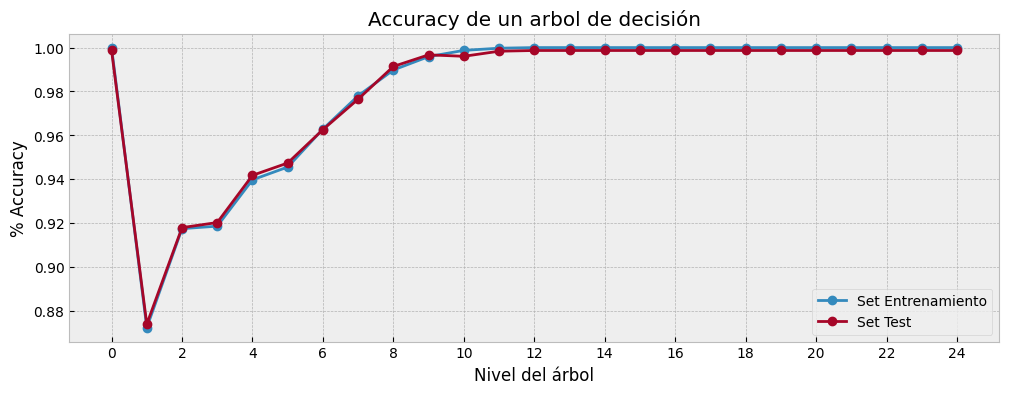

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(A_train,marker='o', label='Set Entrenamiento')
ax.plot(A_test,marker='o', label='Set Test', color='C1')

ax.set_xlabel('Nivel del árbol')
ax.set_xticks(range(0,26,2))
ax.set_ylabel('% Accuracy')
#ax.set_ylim(0, 1.1)
ax.set_title('Accuracy de un arbol de decisión')
ax.legend()

In [ ]:

arbol_de_decision = DecisionTreeClassifier(max_depth=4, random_state = 42)

arbol_de_decision.fit(X_train,y_train)

y_train_pred = arbol_de_decision.predict(X_train)

y_test_pred = arbol_de_decision.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de entrenamiento:', round(train_accuracy,4))
#print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',round(test_accuracy,3))




% de aciertos sobre el set de entrenamiento: 0.9397
% de aciertos sobre el set de evaluación: 0.942


In [ ]:

train_accuracy_10_1_1 = accuracy_score(y_train, y_train_pred)

test_accuracy_10_1_1 = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', round(train_accuracy_10_1_1,3))
print('% de aciertos sobre el set de evaluación:',round(test_accuracy_10_1_1,3))

% de aciertos sobre el set de entrenamiento: 0.94
% de aciertos sobre el set de evaluación: 0.942


In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[ 565,   65],
       [ 111, 2280]])

In [ ]:
precision_10_1_1 = round(precision_score(y_test, y_test_pred),5)
precision_10_1_1

0.97228

In [ ]:
recall_10_1_1 = round(recall_score(y_test, y_test_pred),5)
recall_10_1_1

0.95358

roc_auc_score for DecisionTree:  0.97201


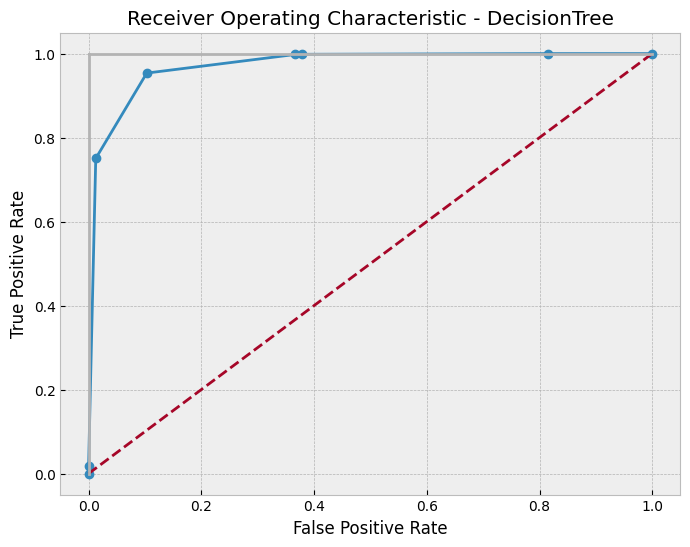

In [ ]:
y_score1 = arbol_de_decision.predict_proba(X_test)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
roc_10_1_1 = round(roc_auc_score(y_test, y_score1),5)
print('roc_auc_score for DecisionTree: ', roc_10_1_1)

plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1, marker = 'o')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##16 Random Forest

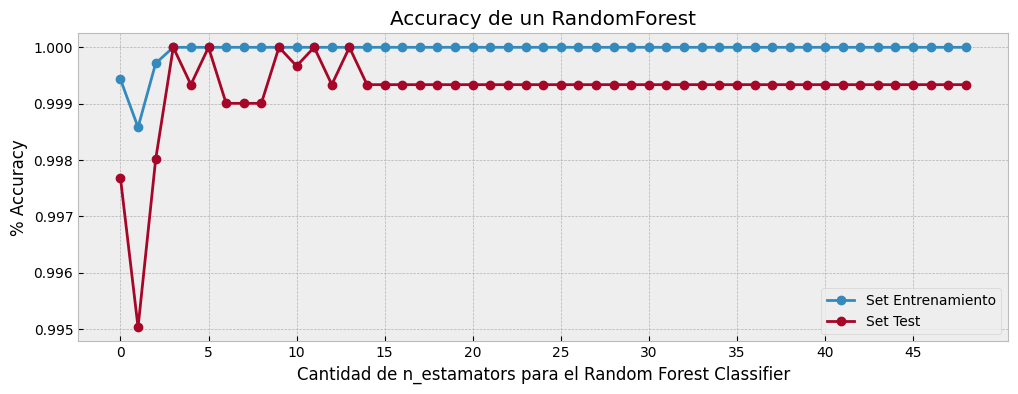

In [ ]:
A_train = []
A_test = []

for i in range(1,50):

    #Creamos el modelo
    random_forest_model = RandomForestClassifier(n_estimators = i, random_state = 42)
    #Entrenamos el modelo
    random_forest_model.fit(X_train,y_train)
    #Prediccion en Train y Test
    y_train_pred = random_forest_model.predict(X_train)
    y_test_pred = random_forest_model.predict(X_test)
    #Calculo el accuracy en Train y Test
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Acumulo los resultados de Accuracy para cada corrida:

    A_train.append(train_accuracy)
    A_test.append(test_accuracy)

fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(A_train,marker='o', label='Set Entrenamiento')
ax.plot(A_test,marker='o', label='Set Test', color='C1')

ax.set_xlabel('Cantidad de n_estamators para el Random Forest Classifier')
ax.set_xticks(range(0,50,5))
ax.set_ylabel('% Accuracy')
#ax.set_ylim(0, 1.1)
ax.set_title('Accuracy de un RandomForest')
ax.legend()

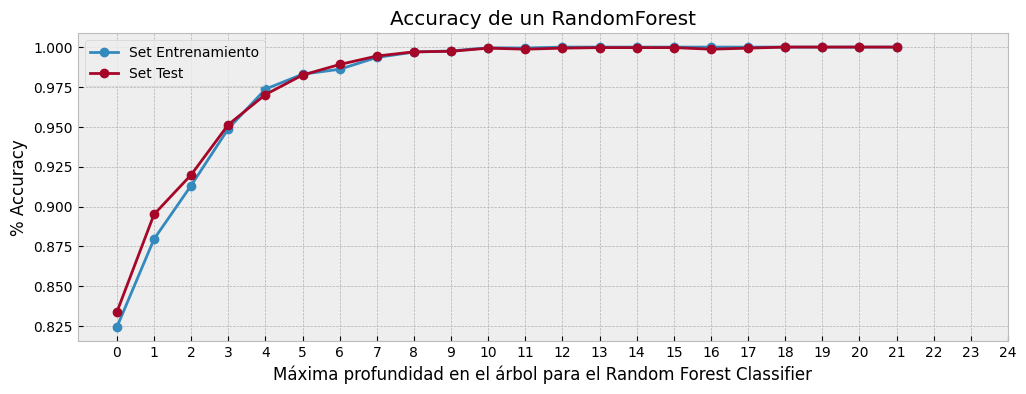

In [ ]:
A_train = []
A_test = []

for i in range(3,25):

    #Creamos el modelo
    random_forest_model = RandomForestClassifier(n_estimators = 9,  class_weight="balanced",
                                                 max_depth = i, random_state = 42)
    random_forest_model.fit(X_train,y_train) #Entrenamos el modelo
    y_train_pred = random_forest_model.predict(X_train) #Prediccion en Train
    y_test_pred = random_forest_model.predict(X_test) #Prediccion en Test
    train_accuracy = accuracy_score(y_train, y_train_pred) #Calculo el accuracy en Train
    test_accuracy = accuracy_score(y_test, y_test_pred) #Calculo el accuracy en Test

    # Acumulo los resultados de Accuracy para cada corrida:

    A_train.append(train_accuracy)
    A_test.append(test_accuracy)

fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(A_train,marker='o', label='Set Entrenamiento')
ax.plot(A_test,marker='o', label='Set Test', color='C1')

ax.set_xlabel('Máxima profundidad en el árbol para el Random Forest Classifier')
ax.set_xticks(range(0,25,1))
ax.set_ylabel('% Accuracy')
#ax.set_ylim(0, 1.1)
ax.set_title('Accuracy de un RandomForest')
ax.legend()

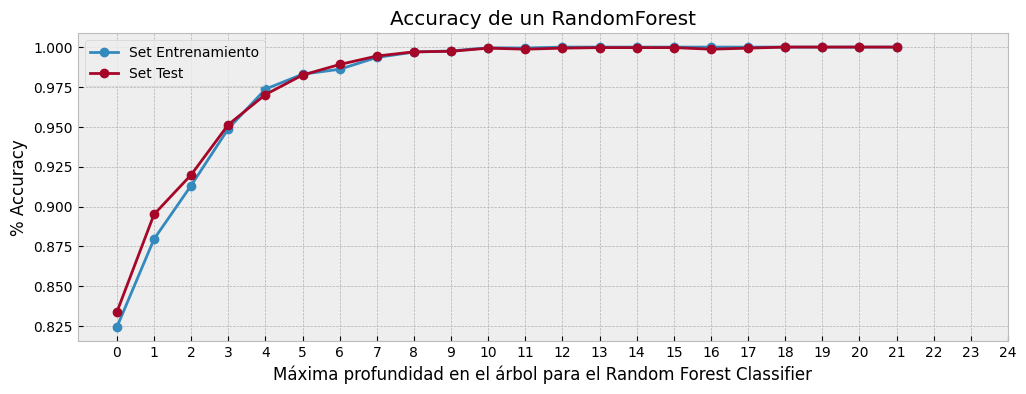

In [ ]:
A_train = []
A_test = []

for i in range(3,25):


    random_forest_model = RandomForestClassifier(n_estimators = 9,  class_weight="balanced",
                                                 max_depth = i, random_state = 42)
    random_forest_model.fit(X_train,y_train)
    y_train_pred = random_forest_model.predict(X_train)
    y_test_pred = random_forest_model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred) #

    A_train.append(train_accuracy)
    A_test.append(test_accuracy)

fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(A_train,marker='o', label='Set Entrenamiento')
ax.plot(A_test,marker='o', label='Set Test', color='C1')

ax.set_xlabel('Máxima profundidad en el árbol para el Random Forest Classifier')
ax.set_xticks(range(0,25,1))
ax.set_ylabel('% Accuracy')

ax.set_title('Accuracy de un RandomForest')
ax.legend()

In [ ]:

random_forest_model = RandomForestClassifier(n_estimators=9,
                                             max_depth =3,
                                             random_state=42,
                                             max_features="log2")


random_forest_model.fit(X_train, y_train)


y_train_pred_random_forest_model = random_forest_model.predict(X_train)
y_test_pred_random_forest_model = random_forest_model.predict(X_test)


train_accuracy_random_forest = accuracy_score(y_train, y_train_pred_random_forest_model)
test_accuracy_random_forest = accuracy_score(y_test, y_test_pred_random_forest_model)

print('% de aciertos sobre el set de entrenamiento:', round(train_accuracy_random_forest,3))
print('% de aciertos sobre el set de evaluación:',round(test_accuracy_random_forest,3))



% de aciertos sobre el set de entrenamiento: 0.918
% de aciertos sobre el set de evaluación: 0.919


In [ ]:

train_accuracy_10_2_2 = accuracy_score(y_train, y_train_pred_random_forest_model)

test_accuracy_10_2_2 = accuracy_score(y_test, y_test_pred_random_forest_model)

print('% de aciertos sobre el set de entrenamiento:', round(train_accuracy_10_2_2,3))
print('% de aciertos sobre el set de evaluación:',round(test_accuracy_10_2_2,3))

% de aciertos sobre el set de entrenamiento: 0.918
% de aciertos sobre el set de evaluación: 0.919


In [ ]:
confusion_matrix(y_test, y_test_pred_random_forest_model)

array([[ 393,  237],
       [   9, 2382]])

In [ ]:
precision_10_2_2 = round(precision_score(y_test, y_test_pred_random_forest_model),5)
precision_10_2_2

0.90951

In [ ]:
recall_10_2_2 = round(recall_score(y_test, y_test_pred_random_forest_model),5)
recall_10_2_2

0.99624

##17 Logistic Regression

In [ ]:

regresion_logistica = LogisticRegression()


regresion_logistica.fit(X_train, y_train)


y_train_pred_regresion_logistica = regresion_logistica.predict(X_train)
y_test_pred_regresion_logistica = regresion_logistica.predict(X_test)


train_accuracy_regresion_logistica = accuracy_score(y_train, y_train_pred_regresion_logistica)
test_accuracy_regresion_logistica = accuracy_score(y_test, y_test_pred_regresion_logistica)

print('% de aciertos sobre el set de entrenamiento:', round(train_accuracy_regresion_logistica,3))
print('% de aciertos sobre el set de evaluación:',round(test_accuracy_regresion_logistica,3))

% de aciertos sobre el set de entrenamiento: 0.914
% de aciertos sobre el set de evaluación: 0.912


In [ ]:

train_accuracy_10_3_1 = accuracy_score(y_train, y_train_pred_regresion_logistica)


test_accuracy_10_3_1 = accuracy_score(y_test, y_test_pred_regresion_logistica)

print('% de aciertos sobre el set de entrenamiento:', round(train_accuracy_10_3_1,3))
print('% de aciertos sobre el set de evaluación:',round(test_accuracy_10_3_1,3))

% de aciertos sobre el set de entrenamiento: 0.914
% de aciertos sobre el set de evaluación: 0.912


In [ ]:
confusion_matrix(y_test, y_test_pred_regresion_logistica)

array([[ 432,  198],
       [  69, 2322]])

In [ ]:
precision_10_3_1 = round(precision_score(y_test, y_test_pred_regresion_logistica),5)
precision_10_3_1

0.92143

In [ ]:
recall_10_3_1 = round(recall_score(y_test, y_test_pred_regresion_logistica),5)
recall_10_3_1

0.97114

roc_auc_score for regresion_logistica:  0.94169


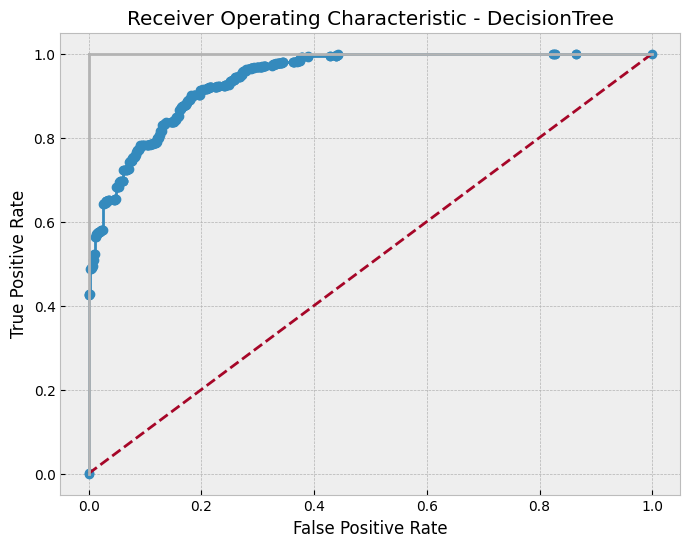

In [ ]:
y_score1 = regresion_logistica.predict_proba(X_test)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
roc_10_3_1 = round(roc_auc_score(y_test, y_score1),5)
print('roc_auc_score for regresion_logistica: ', roc_10_3_1)

plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1, marker = 'o')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
d3 = {'LogReg':[test_accuracy_10_3_1,precision_10_3_1,recall_10_3_1,roc_10_3_1]}

LogReg = pd.DataFrame(d3, index = ['Accuracy','Precision','Recall','ROC_curve'])
LogReg

,LogReg
Accuracy,0.911619
Precision,0.921430
Recall,0.971140
ROC_curve,0.941690


##18 KNN

In [ ]:

classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 5)


classifier.fit(X_train, y_train)


y_train_pred_knn = classifier.predict(X_train)
y_test_pred_knn = classifier.predict(X_test)


train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)

print('% de aciertos sobre el set de entrenamiento:', round(train_accuracy_knn,3))
print('% de aciertos sobre el set de evaluación:',round(test_accuracy_knn,3))

% de aciertos sobre el set de entrenamiento: 0.994
% de aciertos sobre el set de evaluación: 0.993


In [ ]:

train_accuracy_10_4_1 = accuracy_score(y_train, y_train_pred_knn)

test_accuracy_10_4_1 = accuracy_score(y_test, y_test_pred_knn)

print('% de aciertos sobre el set de entrenamiento:', round(train_accuracy_10_4_1,3))
print('% de aciertos sobre el set de evaluación:',round(test_accuracy_10_4_1,3))

% de aciertos sobre el set de entrenamiento: 0.994
% de aciertos sobre el set de evaluación: 0.993


In [ ]:
confusion_matrix(y_test, y_test_pred_knn)

array([[ 613,   17],
       [   4, 2387]])

In [ ]:
precision_10_4_1 = round(precision_score(y_test, y_test_pred_knn),5)
precision_10_4_1

0.99293

In [ ]:
recall_10_4_1 = round(recall_score(y_test, y_test_pred_knn),5)
recall_10_4_1

0.99833

roc_auc_score for knn classifier:  0.99742


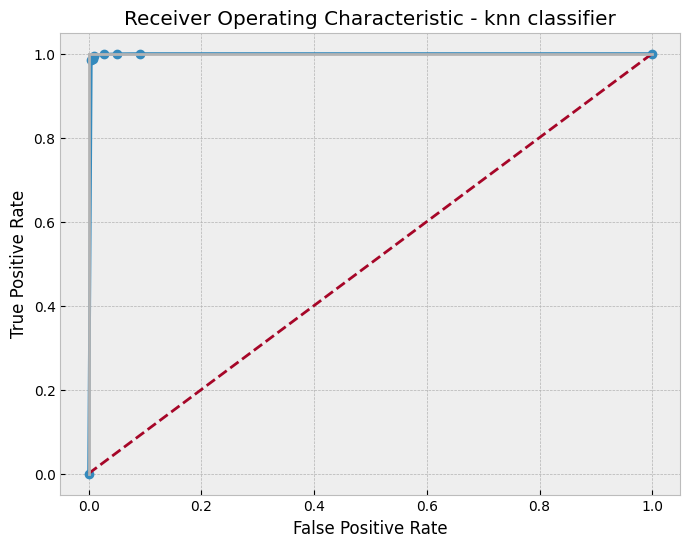

In [ ]:
y_score1 = classifier.predict_proba(X_test)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
roc_10_4_1 = round(roc_auc_score(y_test, y_score1),5)
print('roc_auc_score for knn classifier: ', roc_10_4_1)

plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - knn classifier')
plt.plot(false_positive_rate1, true_positive_rate1, marker = 'o')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
d4 = {'knn':[test_accuracy_10_4_1,precision_10_4_1,recall_10_4_1,roc_10_4_1]}

knn_classifier = pd.DataFrame(d4, index = ['Accuracy','Precision','Recall','ROC_curve'])
knn_classifier

,knn
Accuracy,0.993049
Precision,0.992930
Recall,0.998330
ROC_curve,0.997420


##19 Oversampling balanced Árbol de decisión




Accuracy:
% de aciertos sobre el set de entrenamiento: 0.94
% de aciertos sobre el set de evaluación: 0.942 

 Matriz de Confusión
[[ 565   65]
 [ 111 2280]]

 Precisión: 0.97228

 Recall:  0.95358

 roc_auc_score for DecisionTree:  0.97201


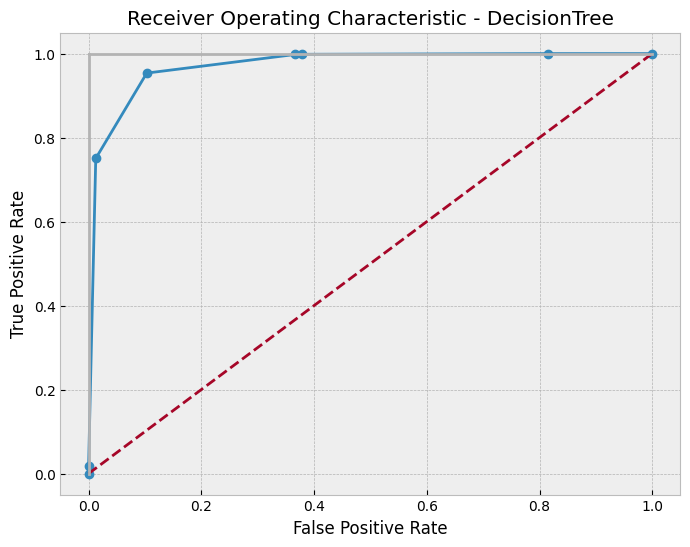

In [ ]:

arbol_de_decision = DecisionTreeClassifier(max_depth=4, random_state = 42)
arbol_de_decision.fit(X_train,y_train)
y_train_pred = arbol_de_decision.predict(X_train)
y_test_pred = arbol_de_decision.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


print('Accuracy:')
train_accuracy_10_6_1_1 = accuracy_score(y_train, y_train_pred)
test_accuracy_10_6_1_1 = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de entrenamiento:', round(train_accuracy_10_6_1_1,3))
print('% de aciertos sobre el set de evaluación:',round(test_accuracy_10_6_1_1,3),'\n')

print(' Matriz de Confusión')
print(confusion_matrix(y_test, y_test_pred) )
precision_10_6_1_1 = round(precision_score(y_test, y_test_pred),5)
print('\n Precisión:', precision_10_6_1_1)

recall_10_6_1_1 = round(recall_score(y_test, y_test_pred),5)
print('\n Recall: ', recall_10_6_1_1)


y_score1 = arbol_de_decision.predict_proba(X_test)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
roc_10_6_1_1 = round(roc_auc_score(y_test, y_score1),5)
print('\n roc_auc_score for DecisionTree: ', roc_10_6_1_1)

plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1, marker = 'o')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###19.1 Oversampling balanced Logistic Regression

Accuracy:
% de aciertos sobre el set de entrenamiento: 0.914
% de aciertos sobre el set de evaluación: 0.912 

 Matriz de Confusión
[[ 432  198]
 [  69 2322]]

 Precisión: 0.92143

 Recall:  0.97114

 roc_auc_score for DecisionTree:  0.97201


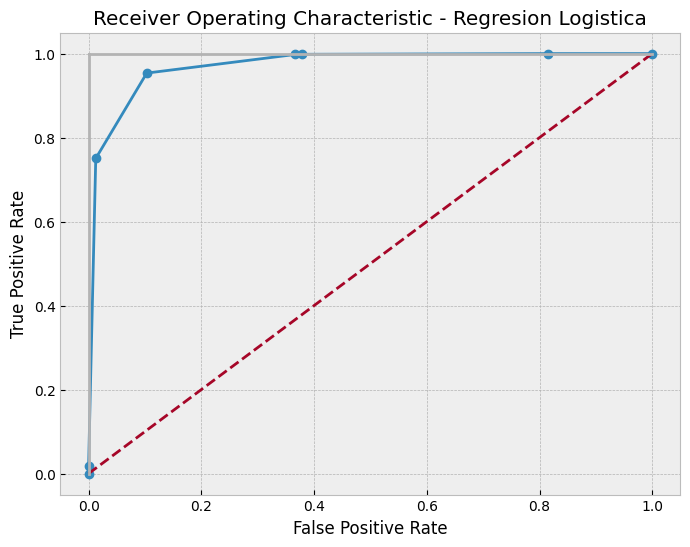

In [ ]:

regresion_logistica = LogisticRegression()

regresion_logistica.fit(X_train, y_train)

y_train_pred = regresion_logistica.predict(X_train)
y_test_pred = regresion_logistica.predict(X_test)


print('Accuracy:')
train_accuracy_10_6_1_3 = accuracy_score(y_train, y_train_pred)
test_accuracy_10_6_1_3 = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de entrenamiento:', round(train_accuracy_10_6_1_3,3))
print('% de aciertos sobre el set de evaluación:',round(test_accuracy_10_6_1_3,3),'\n')


print(' Matriz de Confusión')
print(confusion_matrix(y_test, y_test_pred) )


precision_10_6_1_3 = round(precision_score(y_test, y_test_pred),5)
print('\n Precisión:', precision_10_6_1_3)


recall_10_6_1_3 = round(recall_score(y_test, y_test_pred),5)
print('\n Recall: ', recall_10_6_1_3)


y_score1 = arbol_de_decision.predict_proba(X_test)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
roc_10_6_1_3 = round(roc_auc_score(y_test, y_score1),5)
print('\n roc_auc_score for DecisionTree: ', roc_10_6_1_3)

plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - Regresion Logistica')
plt.plot(false_positive_rate1, true_positive_rate1, marker = 'o')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##20  Stratified k-fold Y GridSearch

In [ ]:

X = df1_1.drop("Do men and women have equal ownership rights to immovable property?", axis=1).to_numpy()

y = df1_1['Do men and women have equal ownership rights to immovable property?'].to_numpy()

print('X = ', X.shape)
print('y = ', y.shape)

X =  (10070, 24)
y =  (10070,)


In [ ]:

skf = StratifiedKFold(n_splits=4, random_state=42, shuffle=True)


train, test = list(skf.split(X, y))[0]

X_train = X[train]
X_test = X[test]
y_train = y[train]
y_test= y[test]

print('Tamaño de los sets de Test y Train considerando Stratified k-fold Y GridSearch:')
print('')
print('X_train = ', X_train.shape)
print('y_train = ', y_train.shape)
print('X_test = ', X_test.shape)
print('y_test = ', y_test.shape)

Tamaño de los sets de Test y Train considerando Stratified k-fold Y GridSearch:

X_train =  (7552, 24)
y_train =  (7552,)
X_test =  (2518, 24)
y_test =  (2518,)


###20.1 Árbol de decisión

In [ ]:

t = DecisionTreeClassifier(random_state = 42)

par = list(np.arange(0.0, 1., step=0.05))
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)


param_grid = {'max_depth' : list(np.arange(2, 11, step=1)), #np.arange(2,11,1),
              'criterion':['gini', 'entropy'],
              'splitter':['best', 'random'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'ccp_alpha':par
             }

model = GridSearchCV(estimator=t, param_grid = param_grid,
                     cv=cv, scoring = 'roc_auc') #'accuracy')#,'roc_auc' ])

In [ ]:
model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.0, 0.05, 0.1, 0.15000000000000002, 0.2,
                                       0.25, 0.30000000000000004,
                                       0.35000000000000003, 0.4, 0.45, 0.5,
                                       0.55, 0.6000000000000001, 0.65,
                                       0.7000000000000001, 0.75, 0.8,
                                       0.8500000000000001, 0.9,
                                       0.9500000000000001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [ ]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'splitter': 'best'}
Mejor Score: 0.9944949275562018



Accuracy:
% de aciertos sobre el set de entrenamiento: 0.824
% de aciertos sobre el set de evaluación: 0.826 

 Matriz de Confusión
[[ 395  133]
 [ 305 1685]]

 Precisión: 0.92684

 Recall:  0.84673

 roc_auc_score for DecisionTree:  0.88786


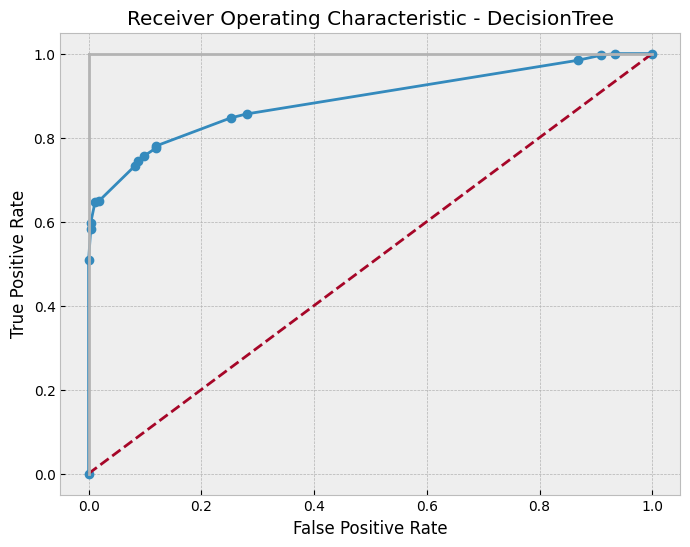

In [ ]:

arbol_de_decision = DecisionTreeClassifier(random_state = 42,
                                          criterion = 'entropy',
                                          splitter = 'random',
                                          max_depth = 5,
                                          max_features ='auto',
                                          ccp_alpha = 0.0 )


arbol_de_decision.fit(X_train,y_train) #Entrenamos el modelo
y_train_pred = arbol_de_decision.predict(X_train) #Prediccion en Train
y_test_pred = arbol_de_decision.predict(X_test) #Prediccion en Test

print('Accuracy:')
train_accuracy_10_7_1_1 = accuracy_score(y_train, y_train_pred)
test_accuracy_10_7_1_1 = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de entrenamiento:', round(train_accuracy_10_7_1_1,3))
print('% de aciertos sobre el set de evaluación:',round(test_accuracy_10_7_1_1,3),'\n')

print(' Matriz de Confusión')
print(confusion_matrix(y_test, y_test_pred) )


precision_10_7_1_1 = round(precision_score(y_test, y_test_pred),5)
print('\n Precisión:', precision_10_7_1_1)


recall_10_7_1_1 = round(recall_score(y_test, y_test_pred),5)
print('\n Recall: ', recall_10_7_1_1)


y_score1 = arbol_de_decision.predict_proba(X_test)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
roc_10_7_1_1 = round(roc_auc_score(y_test, y_score1),5)
print('\n roc_auc_score for DecisionTree: ', roc_10_7_1_1)

plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1, marker = 'o')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
d7_1 = {'arbol_optimizado':[test_accuracy_10_7_1_1,precision_10_7_1_1, recall_10_7_1_1,roc_10_7_1_1]}

arbol1_sg = pd.DataFrame(d7_1, index = ['Accuracy','Precision','Recall','ROC_curve'])
arbol1_sg

,arbol_optimizado
Accuracy,0.826052
Precision,0.926840
Recall,0.846730
ROC_curve,0.887860


**ANALISIS** Como en el modelo de regresion linear y por el tipo de variable, si bien es alta la prediccion tambien lo es la tasa de falsos positivos y errores, por lo que debemos centranos en analisis mas evolutivos que de variables en particular.